# Benchmarks for OO Game Design

First lets load in our benchmark code generated from the C++ program

In [16]:
import numpy as np

renderFile=open('renderBench.txt',"r")
renderData=renderFile.readlines()
updateFile=open('updateBench.txt',"r")
updateData=updateFile.readlines()
updateDurations=[]
renderDurations=[]
updateResolution=''
renderResolution=''
for i in updateData :
    if 'Duration' in i :
        data=i.split('\t')
        updateDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        updateResolution=data[1]
        
for i in renderData :
    if 'Duration' in i :
        data=i.split('\t')
        renderDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        renderResolution=data[1]


Now we can do some data analysis on the times and see what happens

In [17]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

renderDF=pd.DataFrame(data=renderDurations)
renderDF.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])

,0
count,134.000000
mean,107.671642
std,290.459625
min,46.000000
25%,56.000000
50%,65.000000
75%,90.750000
90%,115.100000
99%,852.140000
99.9%,2968.853000


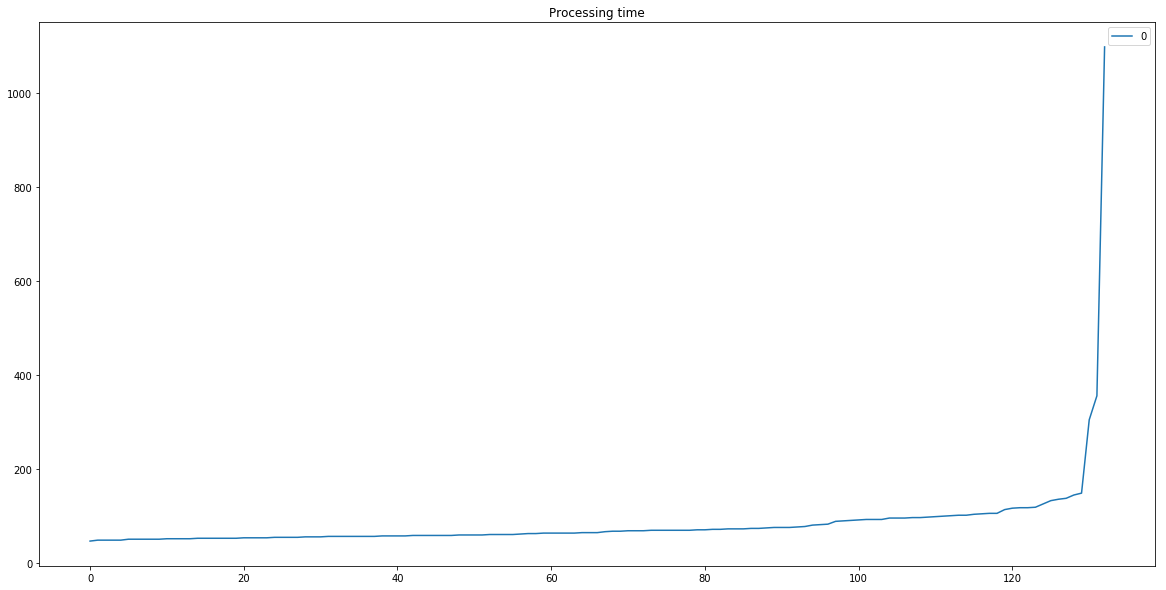

In [25]:
#renderDF.hist(grid=True, figsize=(20, 10), bins=50)

S = renderDF
S = S[~((S - S.mean()).abs() > 3.5 * S.std())]


ndf = pd.DataFrame(data=S)
#ndf['large'] = S
ndf.plot(figsize=(20, 10), title='Processing time')

